In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv(r'C:\Users\varun\Downloads\homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['area','bedrooms']],df.price,test_size=0.2,random_state=25)

In [16]:
x_train

,area,bedrooms
6,2732,4
18,2770,3
16,1180,3
0,1056,2
3,1521,3
7,3300,4
1,2600,4
5,1170,2
14,2250,3
9,3700,5


In [17]:
x_test

,area,bedrooms
13,1100,2
11,2785,4
2,1440,3
10,1800,3


In [18]:
y_train

6     135.00
18    102.00
16     48.00
0      39.07
3      75.00
7     155.00
1     120.00
5      38.00
14    101.00
9     167.00
19     32.00
17     60.00
8      50.00
12     38.00
15     42.00
4      51.00
Name: price, dtype: float64

In [19]:
y_test

13     40.0
11    140.0
2      62.0
10     82.0
Name: price, dtype: float64

In [26]:
# Initialize MinMaxScaler for x_train
x_scaler = MinMaxScaler()

# Fit and transform x_train
x_train_scaled = x_scaler.fit_transform(x_train)

In [27]:
x_train_scaled

array([[0.6662069 , 0.75      ],
       [0.67931034, 0.5       ],
       [0.13103448, 0.5       ],
       [0.08827586, 0.25      ],
       [0.24862069, 0.5       ],
       [0.86206897, 0.75      ],
       [0.62068966, 0.75      ],
       [0.12758621, 0.25      ],
       [0.5       , 0.5       ],
       [1.        , 1.        ],
       [0.        , 0.        ],
       [0.25517241, 0.5       ],
       [0.17586207, 0.5       ],
       [0.06896552, 0.25      ],
       [0.12931034, 0.25      ],
       [0.13793103, 0.25      ]])

In [35]:
#reshaping the 1d array into 2d array 
y_sca=MinMaxScaler()
y_train_sca=y_sca.fit_transform(y_train.values.reshape(y_train.shape[0],1))

In [34]:
y_train_sca

array([[0.76296296],
       [0.51851852],
       [0.11851852],
       [0.05237037],
       [0.31851852],
       [0.91111111],
       [0.65185185],
       [0.04444444],
       [0.51111111],
       [1.        ],
       [0.        ],
       [0.20740741],
       [0.13333333],
       [0.04444444],
       [0.07407407],
       [0.14074074]])

**implement mini batch gradient descent**

In [45]:
 def mini_batch_gradient_descent(x_train_scaled, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = x_train_scaled.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = x_train_scaled.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        x_train_scaled_tmp = x_train_scaled[random_indices]
        y_train_sca_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            x_train_scaledj = x_train_scaled_tmp[j:j+batch_size]
            y_train_scaj = y_train_sca_tmp[j:j+batch_size]
            y_predicted = np.dot(w, x_train_scaledj.T) + b
            
            w_grad = -(2/len(x_train_scaledj))*(x_train_scaledj.T.dot(y_train_scaj-y_predicted))
            b_grad = -(2/len(x_train_scaledj))*np.sum(y_train_scaj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(y_train_scaj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    x_train_scaled,
    y_train_sca.reshape(y_train_sca.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.69078118, 0.65847382]), -0.212477381547241, 0.04700816083837133)

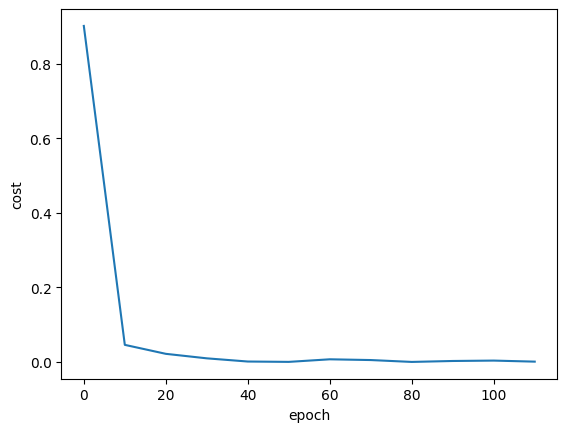

In [46]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)
